In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal as mn

In [2]:
data = pd.read_csv("./input/heart_2020_cleaned.csv")
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
data.shape

(319795, 18)

In [6]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [7]:
# Drop the rows that has nonsense zero values 
data = data[-(data[data.columns[1:-1]] == 0).any(axis=1)]
data.shape

(50733, 18)

In [8]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,50733.000000,50733.000000,50733.000000,50733.000000
mean,29.582405,11.874559,12.868665,6.819683
std,7.666112,11.053503,10.593868,1.822964
min,12.020000,1.000000,1.000000,1.000000
25%,24.210000,2.000000,3.000000,6.000000
50%,28.250000,7.000000,10.000000,7.000000
75%,33.450000,20.000000,20.000000,8.000000
max,93.970000,30.000000,30.000000,24.000000


In [9]:
data.groupby("HeartDisease").median()

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,28.12,5.0,10.0,7.0
Yes,29.29,16.0,15.0,7.0


In [10]:
# To know how data are related to each other
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.101983,0.061542,-0.032757
PhysicalHealth,0.101983,1.000000,0.383141,-0.057668
MentalHealth,0.061542,0.383141,1.000000,-0.109138
SleepTime,-0.032757,-0.057668,-0.109138,1.000000


<AxesSubplot:>

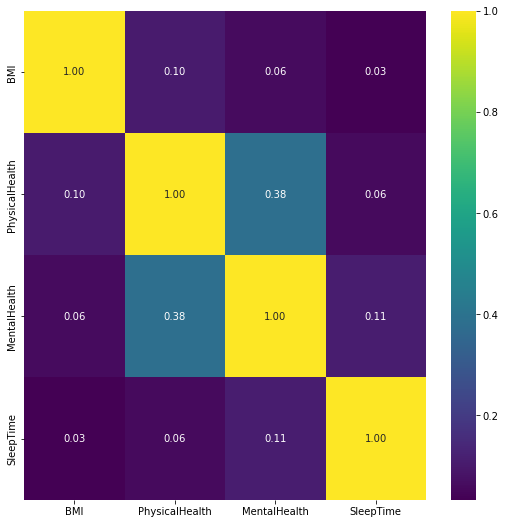

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()), annot = True, cmap = "viridis", fmt = "0.2f")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PhysicalHealth')

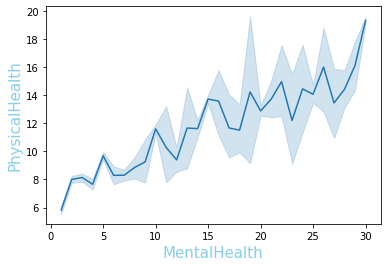

In [12]:
X = data["MentalHealth"].values
Y = data["PhysicalHealth"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("MentalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("PhysicalHealth", fontsize = 15,color="skyblue")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PhysicalHealth')

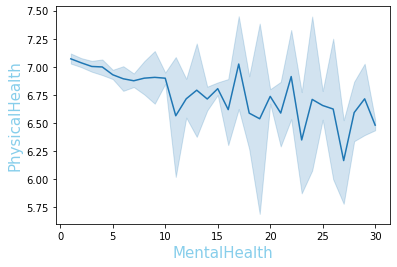

In [13]:
X = data["MentalHealth"].values
Y = data["SleepTime"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("MentalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("PhysicalHealth", fontsize = 15,color="skyblue")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PhysicalHealth')

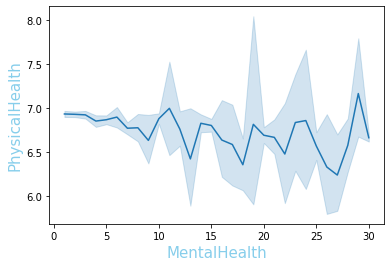

In [14]:
X = data["PhysicalHealth"].values
Y = data["SleepTime"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("MentalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("PhysicalHealth", fontsize = 15,color="skyblue")

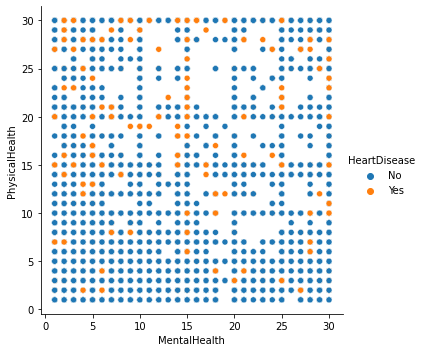

In [15]:
sns.relplot(x="MentalHealth",y="PhysicalHealth", data=data, hue="HeartDisease")

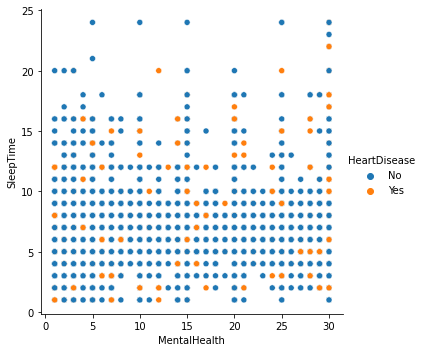

In [16]:
sns.relplot(x="MentalHealth",y="SleepTime", data=data, hue="HeartDisease")

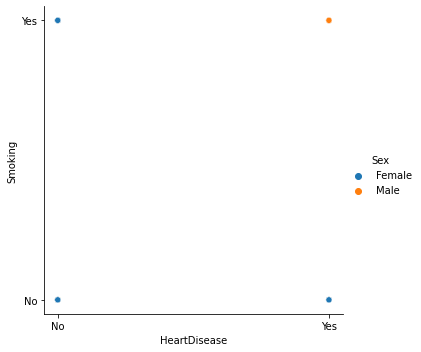

In [17]:
sns.relplot(x="HeartDisease",y="Smoking", data=data, hue="Sex")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'HeartDisease')

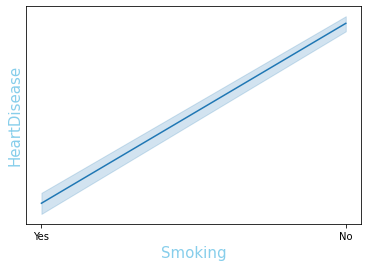

In [18]:
X = data["Smoking"].values
Y = data["HeartDisease"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Smoking", fontsize = 15,color="skyblue")
line_plot.set_ylabel("HeartDisease", fontsize = 15,color="skyblue")

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'HeartDisease')

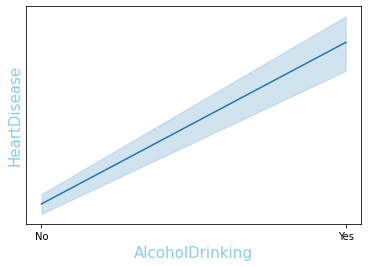

In [19]:
X = data["AlcoholDrinking"].values
Y = data["HeartDisease"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("AlcoholDrinking", fontsize = 15,color="skyblue")
line_plot.set_ylabel("HeartDisease", fontsize = 15,color="skyblue")

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

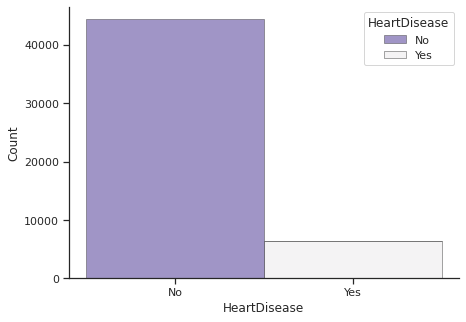

In [20]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (7,5))
sns.despine(f)
sns.histplot(
    data, x= "HeartDisease", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.5"
)

<AxesSubplot:xlabel='AgeCategory', ylabel='Count'>

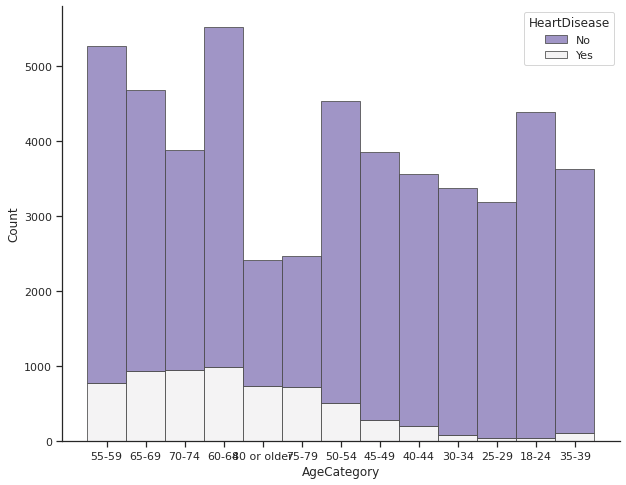

In [21]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "AgeCategory", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

<AxesSubplot:xlabel='KidneyDisease', ylabel='Count'>

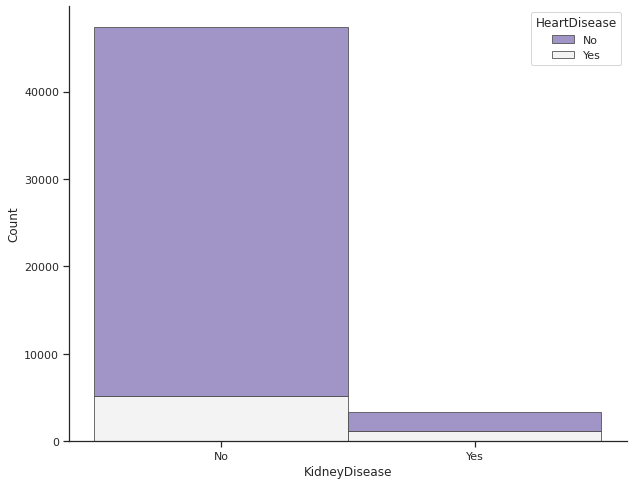

In [22]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "KidneyDisease", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='Count'>

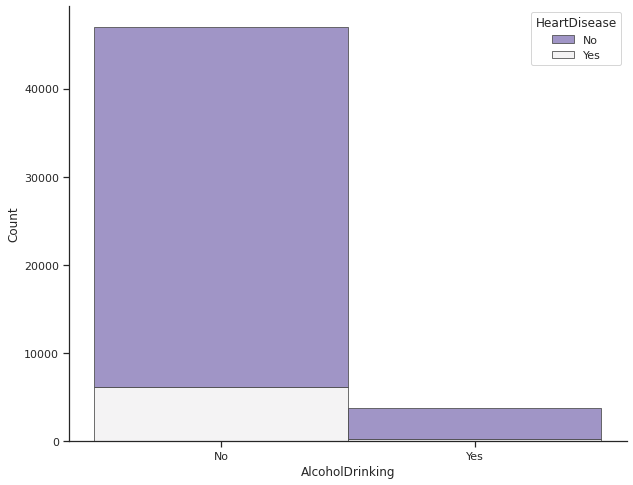

In [23]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "AlcoholDrinking", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

<AxesSubplot:xlabel='Smoking', ylabel='Count'>

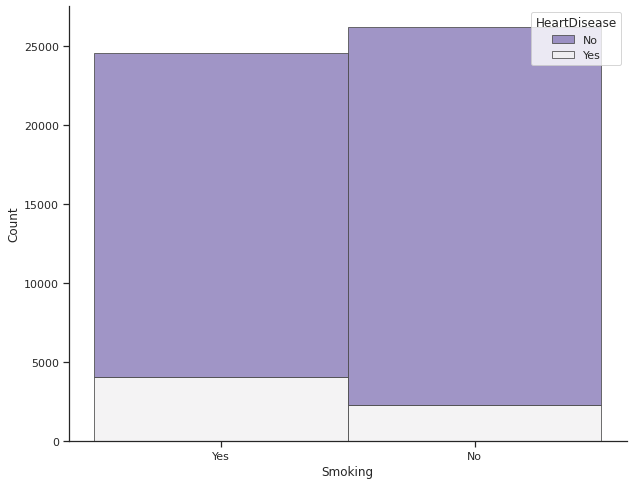

In [24]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "Smoking", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)